# Лобанов Дмитрий Сергеевич, ИУ5-25М

## Рубежный контроль №2

### Тема: Методы обработки текстов

### Решение задачи классификации текстов

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

Необходимо сформировать два варианта векторизации признаков - на основе CountVectorizer и на основе TfidfVectorizer.

В качестве классификаторов необходимо использовать два классификатора по варианту для Вашей группы: ИУ5-25М, ИУ5И-25М, ИУ5-25МВ: SVC и LogisticRegression

Датасет - https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Загрузка данных

In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
train_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amananandrai/ag-news-classification-dataset",
  "train.csv",
)
train_df.shape
train_df.head()

# Load the latest version
test_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amananandrai/ag-news-classification-dataset",
  "test.csv",
)
test_df.shape
test_df.head()

/tmp/ipython-input-8-684696961.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  train_df = kagglehub.load_dataset(
/tmp/ipython-input-8-684696961.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  test_df = kagglehub.load_dataset(


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [9]:
# Названия колонок
train_df.columns = ['label', 'title', 'description']
test_df.columns = ['label', 'title', 'description']

# Объединяем заголовок и описание
X_train = train_df['title'] + " " + train_df['description']
y_train = train_df['label'].astype(str)

X_test = test_df['title'] + " " + test_df['description']
y_test = test_df['label'].astype(str)

# Просмотр классов
print("Уникальные классы:", sorted(y_train.unique()))

Уникальные классы: ['1', '2', '3', '4']


### Векторизация

In [10]:
# CountVectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Logistic Regression

In [11]:
# Count
log_count = LogisticRegression(max_iter=1000)
log_count.fit(X_train_count, y_train)
y_pred_log_count = log_count.predict(X_test_count)

# TF-IDF
log_tfidf = LogisticRegression(max_iter=1000)
log_tfidf.fit(X_train_tfidf, y_train)
y_pred_log_tfidf = log_tfidf.predict(X_test_tfidf)

### SVC

In [12]:
# Count
svc_count = SVC()
svc_count.fit(X_train_count[:10000], y_train[:10000])
y_pred_svc_count = svc_count.predict(X_test_count[:10000])

# TF-IDF
svc_tfidf = SVC()
svc_tfidf.fit(X_train_tfidf[:10000], y_train[:10000])
y_pred_svc_tfidf = svc_tfidf.predict(X_test_tfidf[:10000])

### Оценка

In [13]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n==== {name} ====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression (Count)", y_test, y_pred_log_count)
evaluate_model("Logistic Regression (TF-IDF)", y_test, y_pred_log_tfidf)
evaluate_model("SVC (Count)", y_test, y_pred_svc_count)
evaluate_model("SVC (TF-IDF)", y_test, y_pred_svc_tfidf)


==== Logistic Regression (Count) ====
Accuracy: 0.9096052631578947
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.96      0.97      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600


==== Logistic Regression (TF-IDF) ====
Accuracy: 0.9182894736842105
              precision    recall  f1-score   support

           1       0.93      0.91      0.92      1900
           2       0.96      0.98      0.97      1900
           3       0.89      0.88      0.89      1900
           4       0.89      0.90      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92     

### Confusion Matrix

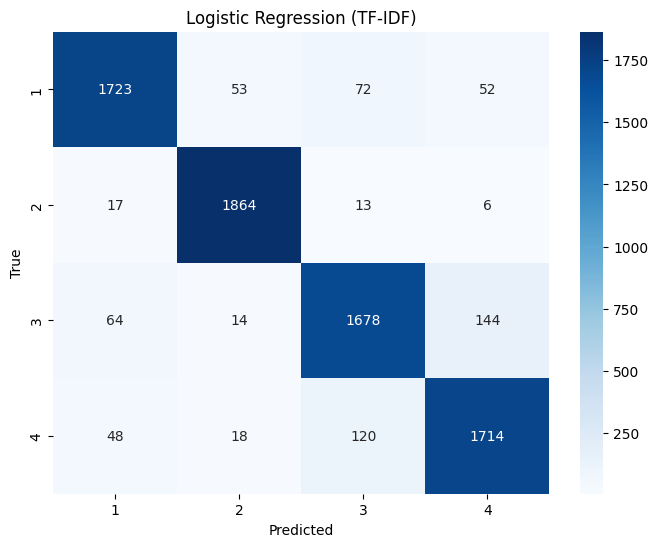

In [14]:
def plot_conf_matrix(y_true, y_pred, title):
    labels = sorted(y_test.unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_conf_matrix(y_test, y_pred_log_tfidf, "Logistic Regression (TF-IDF)")